# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:888]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />\n<link rel="dns-prefetch" href="https://ajax.googleapis.com/" />\r\n<link rel="dns-prefetch" href="https://www.go'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    11/27/2020
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/11-27-2020">
     14,078.12448
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/11-27-2020">
     USD IDR rate for 11/27/2020
    </a>
   </td>
  </tr>
  <tr>
   <td>
    11/26/2020
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate


Do the scrapping process here (please change this markdown with your explanation)

In [6]:
tr = table.find_all('tr')
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get bulan
    Tanggal = row.find_all('td')[0].text
    
    #get inflasi
    Hari = row.find_all('td')[1].text
    
    #get kurs
    Kurs = row.find_all('td')[2].text
    
    temp.append((Tanggal,Hari,Kurs)) 

temp = temp[::-1]
temp 

[('5/31/2020', 'Sunday', '14,664.14584 IDR'),
 ('6/1/2020', 'Monday', '14,586.73900 IDR'),
 ('6/2/2020', 'Tuesday', '14,382.27395 IDR'),
 ('6/3/2020', 'Wednesday', '14,060.78946 IDR'),
 ('6/4/2020', 'Thursday', '14,113.82802 IDR'),
 ('6/5/2020', 'Friday', '14,305.96407 IDR'),
 ('6/7/2020', 'Sunday', '13,989.39489 IDR'),
 ('6/8/2020', 'Monday', '13,867.95377 IDR'),
 ('6/9/2020', 'Tuesday', '13,870.75718 IDR'),
 ('6/10/2020', 'Wednesday', '13,976.91611 IDR'),
 ('6/11/2020', 'Thursday', '13,966.85142 IDR'),
 ('6/12/2020', 'Friday', '14,121.55442 IDR'),
 ('6/14/2020', 'Sunday', '14,145.23543 IDR'),
 ('6/15/2020', 'Monday', '14,021.62200 IDR'),
 ('6/16/2020', 'Tuesday', '14,046.73959 IDR'),
 ('6/17/2020', 'Wednesday', '14,120.02241 IDR'),
 ('6/18/2020', 'Thursday', '14,095.36729 IDR'),
 ('6/19/2020', 'Friday', '14,077.63950 IDR'),
 ('6/21/2020', 'Sunday', '14,068.55627 IDR'),
 ('6/22/2020', 'Monday', '14,136.05128 IDR'),
 ('6/23/2020', 'Tuesday', '14,148.27391 IDR'),
 ('6/24/2020', 'Wednesd

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Tanggal','Hari','Kurs'))
df.head()

,Tanggal,Hari,Kurs
0,5/31/2020,Sunday,"14,664.14584 IDR"
1,6/1/2020,Monday,"14,586.73900 IDR"
2,6/2/2020,Tuesday,"14,382.27395 IDR"
3,6/3/2020,Wednesday,"14,060.78946 IDR"
4,6/4/2020,Thursday,"14,113.82802 IDR"


First, I remove all the comma (,) from **Kurs** Column

In [8]:
df['Kurs'] = df['Kurs'].str.replace(',','')

Then I remove the 'IDR' from **Kurs** Column

In [9]:
df['Kurs'] = df['Kurs'].str.replace(' IDR','')

Then I remove any spaces in **Kurs** Column

In [10]:
df['Kurs'] = df['Kurs'].str.replace(' ','')

After that, I change the **Tanggal** column into Datetime

In [11]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

And **Kurs** column into float

In [12]:
df['Kurs'] = df['Kurs'].astype('float')

Then set the **Tanggal** column as index

In [13]:
df = df.set_index('Tanggal')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

So, here the visualization

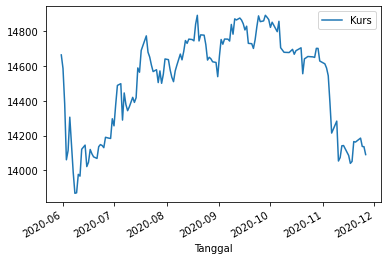

In [14]:
df.plot()

from the visualization above we can see the fluctuated historical exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD) between 5/29/2020 and 11/25/2020

In [15]:
tertinggi = max(df['Kurs'])
tertinggi

14892.32194

In [19]:
terendah = min(df['Kurs'])
terendah

13867.95377

We can see that the highest exchange rates is on Rp. 14892.32194 and the lowest is on Rp 13867.95377

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.